In [1]:
import random
import math
import numbers
import numpy as np
import matplotlib.pyplot as plt
import time

Based on SciKit-Learn datasets.make_blobs (https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/datasets/samples_generator.py)

In [2]:
def make_circles(grid = 11, n_data = 10, n_particle = 5): 
    max_distance = int((grid-1)/2)
    radii = np.random.randint(max_distance,grid,size = (n_data, 2))
    radii = radii.flatten()
    distance = np.random.randint(max_distance, size = n_data)
    distances = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in distance])
    radii1 = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in radii[::2]])
    radii2 = np.array([np.multiply(np.ones(shape = (grid,grid)),y) for y in radii[1::2]])
    circle = np.zeros((n_data, grid, grid))
    circlex = np.zeros((grid, grid))
    circley = np.zeros((grid, grid))
    circlex[:][:][:] = np.arange(grid)
    circley[:][:][:] = np.transpose(circlex)
    x1 = circley - max_distance + distances/2
    x2 = circley - max_distance - distances/2
    y = circlex - max_distance
    position1 = np.sqrt(x1**2+y**2)
    position2 = np.sqrt(x2**2+y**2)
    fill1 = position1 <= radii1
    fill2 = position2 <= radii2
    p1 = np.exp((-1./2.)*(3.*position1/radii1)**2.)
    p2 = np.exp((-1./2.)*(3.*position2/radii2)**2.)
    mask1 = np.zeros(n_data*grid*grid)
    mask2 = np.zeros(n_data*grid*grid)
    for i in range(n_data):
        sub_mask1 = np.zeros(grid*grid)
        sub_mask1[0:n_particle] = 1
        np.random.shuffle(sub_mask1)
        mask1[0+i*grid**2:grid**2+i*grid**2] = sub_mask1
    mask1 = mask1.reshape(n_data, grid, grid)
    for i in range(n_data):
        sub_mask2 = np.zeros(grid*grid)
        sub_mask2[0:n_particle] = 1
        np.random.shuffle(sub_mask2)
        mask2[0+i*grid**2:grid**2+i*grid**2] = sub_mask2
    mask2 = mask2.reshape(n_data, grid, grid)
    p1 = np.where(fill1, p1, 0.0)*mask1
    p2 = np.where(fill2, p2, 0.0)*mask2
    circles = p1 + p2
    circles = circles.reshape(n_data, grid**2)
    radii = radii.reshape(n_data, 2)
    distances = distances.reshape(n_data*grid**2,1)[::grid**2]
    return circles, radii, distances

In [25]:
tic = time.perf_counter()
grid = 32
n_data = 10000
n_particles = 10
circleData, radiiLabels, distanceLabels = make_circles(grid, n_data, n_particles)
toc = time.perf_counter()
print(toc-tic)

2.484852433000924


In [26]:
np.savez('circles_data', circles = circleData, radiilab = radiiLabels, distlab = distanceLabels)

data = np.load('circles_data.npz')
#print(data['circles'])
#print(data['radiilab'])

radius = 
[27 31]
distance between centers = 
[6.]


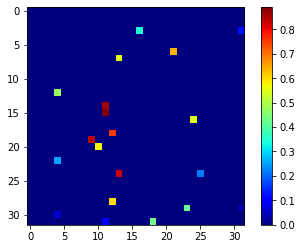

In [27]:
display = circleData[20].reshape(grid,grid)
plt.grid(False)
plt.imshow(display, cmap = 'jet')
print("radius = ")
print(radiiLabels[20])
print("distance between centers = ")
print(distanceLabels[20])
plt.colorbar()